<div align="right"><b>Parin Kittipongdaja<br>
6010421021 <br>
NIDA, Thailand<br>
Parin.kiti@gmail.com<br>
(Parin.kitt@stu.nida.ac.th)<br>
BADS 7201 Programing for Machine Learning<br>
Assignment: I</b></div>

# <center>Click-Through Rate Prediction<center/>



# Introduction
- https://github.com/floydwch/kaggle-cli <<<< (Deprecated)
- https://github.com/Kaggle/kaggle-api
- https://www.kaggle.com/c/avazu-ctr-prediction/data

### Grid serch with 2 model
- https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

### Good Visualization 
- https://www.kaggle.com/chethan187/classification-model-using-logistic-regression
- import cufflinks as cf 

### Coeff of Logistic
- https://towardsdatascience.com/scikit-learn-for-text-analysis-of-amazon-fine-food-reviews-ea3b232c2c1b

## Overview
<p style="text-indent: 2.5em;">
    In online advertising, click-through rate (CTR) is a very important metric for evaluating ad performance. As a result, click prediction systems are essential and widely used for sponsored search and real-time bidding.

![CTR_Contest](https://storage.googleapis.com/kaggle-competitions/kaggle/4002/media/banner_ctr.jpg)
[CTR_Contest](https://www.kaggle.com/c/avazu-ctr-prediction/overview)

<p style="text-indent: 2.5em;">
    For this competition, we have provided 11 days worth of Avazu data to build and test prediction models. Can you find a strategy that beats standard classification algorithms? The winning models from this competition will be released under an open-source license.

# Data Description

### File descriptions
- train - Training set. 10 days of click-through data, ordered chronologically. Non-clicks and clicks are subsampled according to different strategies.
- test - Test set. 1 day of ads to for testing your model predictions. 
- sampleSubmission.csv - Sample submission file in the correct format, corresponds to the All-0.5 Benchmark.

### Data fields
- id: ad identifier
- click: 0/1 for non-click/click
- hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.
- C1 -- anonymized categorical variable
- banner_pos
- site_id
- site_domain
- site_category
- app_id
- app_domain
- app_category
- device_id
- device_ip
- device_model
- device_type
- device_conn_type
- C14-C21 -- anonymized categorical variables

In [1]:
# Identify the python that is used in your jupyter notebook with
import sys
sys.executable

'/usr/bin/python3'

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
# from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import imblearn #handle imbalanced issue
print("imblearn-learn version: {}". format(imblearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



# Input data files are available in the "./data/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the data/avazu-ctr-prediction directory

import os
print(os.listdir('./data/avazu-ctr-prediction'))

# Any results you write to the current directory are saved as output.

Python version: 3.5.3 (default, Sep 27 2018, 17:25:39) 
[GCC 6.3.0 20170516]
pandas version: 0.25.0
matplotlib version: 3.0.3
NumPy version: 1.17.0
SciPy version: 1.3.1
IPython version: 7.7.0
scikit-learn version: 0.21.3


Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

imblearn-learn version: 0.5.0
-------------------------
['train.csv']


/usr/local/lib/python3.5/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [3]:
# Basic library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from tqdm import tqdm
from itertools import cycle


# Data preprocessing
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import SMOTE
from sklearn.utils import resample


from sklearn.linear_model import LogisticRegression


# Evaluation
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.externals import joblib

# Display and Parameter Setting

In [4]:
# Set dataframe display
pd.set_option('display.max_columns', None)  # default = 20
pd.set_option('display.expand_frame_repr', False) # default = True
pd.set_option('display.max_colwidth', -1) # default = 50

In [5]:
seed_num = 7

# Import Data

## Sampling some data to explore

In [6]:
df = pd.read_csv('./data/avazu-ctr-prediction/train.csv', nrows=10000)

# Integer boolean mask
Integer_feature_mask = df.dtypes==int
# filter Integer columns using mask and turn it into a list
Integer_cols = df.columns[Integer_feature_mask].tolist()
Integer_cols.remove('click')
Integer_cols

['hour',
 'C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
id                  10000 non-null uint64
click               10000 non-null int64
hour                10000 non-null int64
C1                  10000 non-null int64
banner_pos          10000 non-null int64
site_id             10000 non-null object
site_domain         10000 non-null object
site_category       10000 non-null object
app_id              10000 non-null object
app_domain          10000 non-null object
app_category        10000 non-null object
device_id           10000 non-null object
device_ip           10000 non-null object
device_model        10000 non-null object
device_type         10000 non-null int64
device_conn_type    10000 non-null int64
C14                 10000 non-null int64
C15                 10000 non-null int64
C16                 10000 non-null int64
C17                 10000 non-null int64
C18                 10000 non-null int64
C19                 1

In [8]:
{'C'+str(i):'category' for i in range(14,22)}

{'C14': 'category',
 'C15': 'category',
 'C16': 'category',
 'C17': 'category',
 'C18': 'category',
 'C19': 'category',
 'C20': 'category',
 'C21': 'category'}

In [9]:
# train_subset data is first 10K rows of 6+GB set
df = pd.read_csv('./data/avazu-ctr-prediction/train.csv',
                 dtype={i:'category' for i in Integer_cols},
#                  parse_dates=["hour"],
                 nrows=10000)

In [10]:
df.sample(10, random_state=seed_num)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
1977,1028360309781657500,0,14102100,1005,0,517b8671,ac5abf20,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,48cc91dc,597f7364,1,0,20560,320,50,2271,0,687,-1,48
3880,10551266148631190296,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,605968c1,4ea23a13,1,0,15708,320,50,1722,0,35,-1,79
52,10009910814812262951,1,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,a079ef6b,2347f47a,75d80bbe,a99f214a,f8c8df20,be87996b,1,2,18993,320,50,2161,0,35,100131,157
2551,10365418511786066539,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,47e1d3ea,d9b5648e,cef3e649,a99f214a,65701b03,aad45b01,1,0,21611,320,50,2480,3,297,100111,61
2246,10323629556803412961,0,14102100,1005,0,030440fe,08ba7db9,76b2941d,ecad2386,7801e8d9,07d7df22,a99f214a,1b2dc559,a8d2c4cf,1,0,20596,320,50,2161,0,35,-1,157
270,10039917029838158594,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,c1cbf73f,4ea23a13,1,0,15708,320,50,1722,0,35,-1,79
601,10086830090279683302,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,0f2161f8,a99f214a,aff3a698,aad45b01,1,0,20980,320,50,2371,0,551,100217,46
2441,10350473235338136994,0,14102100,1002,0,15a497fe,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,bac7fde3,c83fa6a6,6f856677,0,0,17914,320,50,2043,2,39,100084,32
3286,10471749527991641125,0,14102100,1005,0,030440fe,08ba7db9,76b2941d,ecad2386,7801e8d9,07d7df22,a99f214a,b10f9e15,8b1aa260,1,0,20596,320,50,2161,0,35,-1,157
2967,10426463992766292884,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,040affcb,a4528ded,1,0,15707,320,50,1722,0,35,-1,79


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
id                  10000 non-null uint64
click               10000 non-null int64
hour                10000 non-null category
C1                  10000 non-null category
banner_pos          10000 non-null category
site_id             10000 non-null object
site_domain         10000 non-null object
site_category       10000 non-null object
app_id              10000 non-null object
app_domain          10000 non-null object
app_category        10000 non-null object
device_id           10000 non-null object
device_ip           10000 non-null object
device_model        10000 non-null object
device_type         10000 non-null category
device_conn_type    10000 non-null category
C14                 10000 non-null category
C15                 10000 non-null category
C16                 10000 non-null category
C17                 10000 non-null category
C18                 10000 non-null 

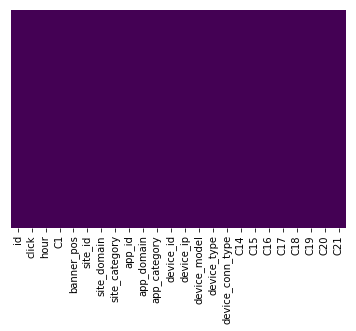

In [12]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [13]:
from pprint import pprint
# Check unique value each column which is less than 5 unique value
col_list = df.columns.tolist()
for i in col_list:
    nuni = df[i].nunique()
    print('\n{} : {}'.format(str(i),nuni))
    if nuni < 5:
        uni = df[i].unique().tolist()
        print('>>> Item Lists: {}'.format(uni))
#         pprint(f'{str(i)} Number of Unique Item: {nuni} Item Lists: {uni}')


id : 10000

click : 2
>>> Item Lists: [0, 1]

hour : 1
>>> Item Lists: ['14102100']

C1 : 6

banner_pos : 4
>>> Item Lists: ['0', '1', '4', '5']

site_id : 381

site_domain : 317

site_category : 14

app_id : 313

app_domain : 31

app_category : 14

device_id : 1075

device_ip : 7302

device_model : 1168

device_type : 4
>>> Item Lists: ['1', '0', '4', '5']

device_conn_type : 4
>>> Item Lists: ['2', '0', '3', '5']

C14 : 271

C15 : 4
>>> Item Lists: ['320', '300', '216', '728']

C16 : 5

C17 : 111

C18 : 4
>>> Item Lists: ['0', '3', '2', '1']

C19 : 32

C20 : 108

C21 : 29


In [14]:
df['id'].nunique()

10000

In [15]:
# How many unique features should we have after?
len(df['device_id'].unique())

1075

0    8294
1    1706
Name: click, dtype: int64


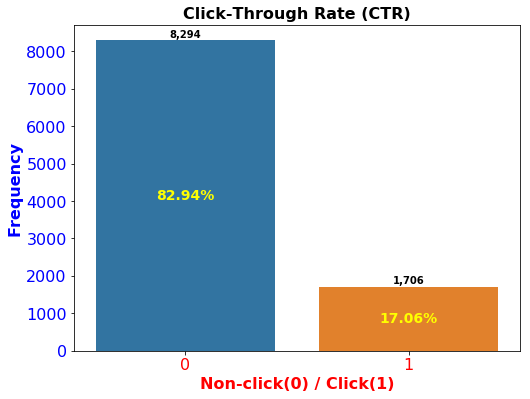

In [16]:
import matplotlib 

# Fill Paramter
fs = 16 # Font size
x_data = df
x_col = 'click' # column to count
x_hue = None # For divide column

matplotlib.rc('xtick', labelsize = fs-2)     
matplotlib.rc('ytick', labelsize = fs-2)

counts = x_data[x_col].value_counts()
max_count = max(counts)
total_count = sum(counts)
print(counts)
fig = plt.figure(figsize= (8,6))
ax = sns.countplot(x = x_col, hue = x_hue, data=x_data, order = counts.iloc[:10].index)
# fig.suptitle('test title', fontsize=12)
ax.set_title('Click-Through Rate (CTR)', fontsize = fs, fontweight='bold' )
ax.set_xlabel('Non-click(0) / Click(1)', color = 'r', fontsize = fs, fontweight='bold')
ax.set_ylabel('Frequency', color = 'b', fontsize = fs, fontweight='bold')
# plt.xticks(rotation=15, color='r', size=16)
plt.xticks(color='r', size=16)
plt.yticks(color='b', size=16)

for i, v in enumerate(counts[:10]):
        ax.text(x = i, y=v + max_count*0.01 , s='{:,}'.format(v), horizontalalignment='center', color='black', fontweight='bold')
        ax.text(x = i, y= v/2, s=str('{:.2f}'.format(v*100/total_count))+'%',
                color='yellow', fontweight='bold', size = 14,
                horizontalalignment='center', 
                verticalalignment='center' 
                )

In [17]:
v =4
'{:,}'.format(v)

'4'

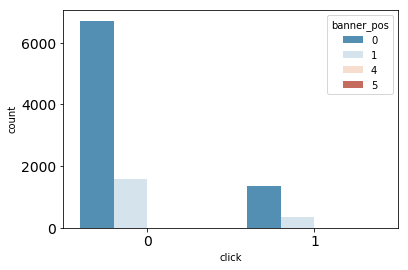

In [18]:
sns.countplot(x='click', hue='banner_pos', data=df, palette='RdBu_r')

# Data Preprocessing

## Encoding Categorical Features
- https://towardsdatascience.com/encoding-categorical-features-21a2651a065c
- Here we will cover three different ways of encoding categorical features: 
>1. LabelEncoder and OneHotEncoder
>2. DictVectorizer
>3. Pandas get_dummies

### LabelEncoder & OneHotEncoder
- The labelEncoder and OneHotEncoder only works on categorical features 
- For multi-class with ordering, labelEncoder is fine. However, if it is not a natural ordering OneHotEncoder will be needed to used after perform LabelEncoder 


### What is the difference between sklearn LabelEncoder and pd.get_dummies?
- https://stackoverflow.com/questions/38413579/what-is-the-difference-between-sklearn-labelencoder-and-pd-get-dummies
- These are just convenience functions falling naturally into the way these two libraries tend to do things, respectively. The first one "condenses" the information by changing things to integers, and the second one "expands" the dimensions allowing (possibly) more convenient access.

- LabelEncoder work same as pd.get_dummies if the categorical feature columns are binary class.
- If it is multi-class the result will different. LabelEncoder work well with a natural ordering for different classes.

sklearn.preprocessing.LabelEncoder simply transforms data, from whatever domain, so that its domain is 0, ..., k - 1, where k is the number of classes.

So, for example

`["paris", "paris", "tokyo", "amsterdam"]`
could become

`[0, 0, 1, 2]`
`pandas.get_dummies` also takes a Series with elements from some domain, but expands it into a DataFrame whose columns correspond to the entries in the series, and the values are 0 or 1 depending on what they originally were. So, for example, the same

`["paris", "paris", "tokyo", "amsterdam"]`
would become a DataFrame with labels

`["paris", "tokyo", "amsterdam"]`
and whose "paris" entry would be the series

`[1, 1, 0, 0]`
The main advantage of the first method is that it conserves space. Conversely, encoding things as integers might give the impression (to you or to some machine learning algorithm) that the order means something. Is "amsterdam" closer to "tokyo" than to "paris" just because of the integer encoding? probably not. The second representation is a bit clearer on that.

### Conclusion
LabelEncoder and OneHotEncoder is usually need to be used together as a two steps method to encode categorical features. LabelEncoder outputs a dataframe type while OneHotEncoder outputs a numpy array. OneHotEncoder has the option to output a sparse matrix. DictVectorizer is a one step method to encode and support sparse matrix output. Pandas get dummies method is so far the most straight forward and easiest way to encode categorical features. The output will remain dataframe type.
As my point of view, the first choice method will be pandas get dummies. But if the number of categorical features are huge, DictVectorizer will be a good choice as it supports sparse matrix output.

In [19]:
final_fea_dict = {'C14': ['15699', '15701', '15702', '15703', '15704', '15705', '15706', '15707', '15708', '17614', '17653', '17654', '17753', '18993', '19015', '19016', '19665', '19743', '20352', '20362', '20366', '20596', '20632', '20633', '21300', '21611', '21665'], 'C15': ['300', '320'], 'C16': ['50'], 'C17': ['1722', '1955', '1993', '1994', '2161', '2162', '2227', '2253', '2264', '2333', '2374', '2446', '2480', '2493'], 'C18': ['2', '3'], 'C19': ['163', '167', '297', '303', '35', '39', '427'], 'C1': ['1002', '1005', '1010'], 'C20': ['100000', '100034', '100048', '100050', '100074', '100075', '100077', '100079', '100081', '100083', '100084', '100105', '100111', '100119', '100128', '100130', '100131', '100148', '100188', '100210', '100228'], 'C21': ['117', '13', '15', '157', '23', '32', '33', '52', '61', '79'], 'app_category': ['0f2161f8', 'cef3e649', 'f95efa07'], 'app_domain': ['2347f47a', '5c5a694b', '7801e8d9', '82e27996', 'd9b5648e'], 'app_id': ['1779deee', '5e3f096f', '89bdfe24', '8c0dcd5a', '9c13b419', 'e2fcccd2', 'ecad2386', 'febd1138'], 'banner_pos': ['1'], 'device_conn_type': ['2', '3'], 'device_type': ['1', '4'], 'site_category': ['28905ebd', '335d28a8', '3e814130', '50e219e0', '76b2941d', 'f028772b'], 'site_domain': ['08ba7db9', '16a36ef3', '17d996e6', '27e3c518', '510bd839', '61eb5bc4', '7256c623', '7687a86e', '7e091613', '9166c161', '98572c79', 'c4342784', 'c4e18dd6', 'c7ca3108', 'e16ceb4b', 'f3845767']}

In [20]:
X = df.drop(['id','click'], axis =1)
y = df['click']

In [21]:
y.values.shape

(10000,)

In [22]:
# Get dummies
X_encoded = pd.get_dummies(X, prefix_sep='_', drop_first=True)
# X head
print(len(X_encoded.columns))
X_encoded.head()

11176


,C1_1002,C1_1005,C1_1007,C1_1008,C1_1010,banner_pos_1,banner_pos_4,banner_pos_5,site_id_02d5151c,site_id_02fb33fd,site_id_030440fe,site_id_0338ff60,site_id_03cecb5d,site_id_04773863,site_id_066a0884,site_id_06a0ac14,site_id_070ca277,site_id_081cfb60,site_id_09c3b4c1,site_id_0a647e36,site_id_0a742914,site_id_0aab7161,site_id_0c2fe9d6,site_id_0d0207b0,site_id_0eb72673,site_id_0f30aed6,site_id_10a74e5b,site_id_11944c42,site_id_12fb4121,site_id_13b31263,site_id_147fe840,site_id_14c5faa4,site_id_14ec6216,site_id_15941585,site_id_15a497fe,site_id_15d93b0b,site_id_16c73019,site_id_178a7b89,site_id_17a1026e,site_id_17caea14,site_id_18859862,site_id_19a1e5c0,site_id_1a5c1d83,site_id_1aaa89da,site_id_1b171d6d,site_id_1b4b015f,site_id_1bf0f8d0,site_id_1d6e0bd7,site_id_1df47d50,site_id_1e25e084,site_id_1fbe01fe,site_id_2092875a,site_id_222acd54,site_id_22d080df,site_id_2328ee8e,site_id_2398553f,site_id_239adfaf,site_id_23d99ea0,site_id_240ecdfd,site_id_258442a1,site_id_26fa1946,site_id_29229f8e,site_id_29cfa778,site_id_2a68aa20,site_id_2b1ddb24,site_id_2c4ed2f7,site_id_2d7bacb1,site_id_2e582cf9,site_id_2ee82a0f,site_id_2fb3751e,site_id_2fb424e8,site_id_2fdff0f2,site_id_30cf412d,site_id_325a8a1e,site_id_325dbe14,site_id_3281baa7,site_id_34040f5c,site_id_344bdd17,site_id_34781e41,site_id_34d1d55f,site_id_35584290,site_id_36b1bd1c,site_id_37189abe,site_id_37ecc00c,site_id_38217daf,site_id_383f4a51,site_id_38c202aa,site_id_395fa97c,site_id_39cffaa4,site_id_39d85719,site_id_3a66a5a5,site_id_3af745f2,site_id_3c20a05a,site_id_3c5d765d,site_id_3ce4be5b,site_id_3d88bdd0,site_id_3dbbce24,site_id_3dc2d6de,site_id_3dff2c35,site_id_3e183f99,site_id_3e3abd65,site_id_3e81fcf1,site_id_3fc3d822,site_id_40cd84f1,site_id_41477778,site_id_43402849,site_id_43907498,site_id_43d6df75,site_id_44637516,site_id_44f60771,site_id_45832b51,site_id_45e91bcc,site_id_461f4ff6,site_id_469fd1ad,site_id_46aba789,site_id_47d1a0f2,site_id_487c858e,site_id_48c42b43,site_id_4a02380f,site_id_4b0f0061,site_id_4bf5bbe2,site_id_4dd0a958,site_id_4ec231b7,site_id_4fd4e711,site_id_5014edea,site_id_5070e53c,site_id_5114c672,site_id_517b8671,site_id_518d6168,site_id_51a8ceda,site_id_529a2583,site_id_52b42525,site_id_52c67a67,site_id_5380ca88,site_id_543a539e,site_id_54e6fb06,site_id_56c2fd20,site_id_572b1ee1,site_id_57fe1b20,site_id_5a83611c,site_id_5abb07e8,site_id_5b08c53b,site_id_5b4d2eda,site_id_5b787406,site_id_5b904c3a,site_id_5bcf81a2,site_id_5c6f356c,site_id_5eb1d12d,site_id_5ee41ff2,site_id_609ab969,site_id_60efd545,site_id_61742004,site_id_61a8c644,site_id_621fc84d,site_id_6256f5b4,site_id_636f3a62,site_id_6399eda6,site_id_63bd7850,site_id_6423a528,site_id_653f65e4,site_id_67ee2827,site_id_686546d3,site_id_69bc54b5,site_id_6b175d24,site_id_6bbe137e,site_id_6bdcda77,site_id_6c5b482c,site_id_6c7e709c,site_id_6ec06dbd,site_id_6f1058d5,site_id_6f34dd1d,site_id_7034b859,site_id_727e79e2,site_id_7294ea0f,site_id_72a56356,site_id_7443a906,site_id_74fb2abe,site_id_7549fe4f,site_id_75f43c5a,site_id_76274f48,site_id_763a42b5,site_id_7697ed3e,site_id_77bfdd7b,site_id_78b4322c,site_id_790c9243,site_id_791b5571,site_id_79df8c62,site_id_7a34d501,site_id_7aec40a2,site_id_7b86de5b,site_id_7c6576be,site_id_7cd8eead,site_id_7dd19f44,site_id_7ed11bd1,site_id_7f05516e,site_id_7f4b0183,site_id_7fa5a4d1,site_id_801dfefb,site_id_803ffc86,site_id_80c7456b,site_id_81894a37,site_id_81bf62aa,site_id_83337efb,site_id_8342c1ae,site_id_83a0ad1a,site_id_84a56636,site_id_84bfe282,site_id_84c7ba46,site_id_856e6d3f,site_id_85f751fd,site_id_88154ade,site_id_887a4754,site_id_8907c166,site_id_897f88f1,site_id_89a490f5,site_id_8b6e6813,site_id_8bc5ccf8,site_id_8c788ce9,site_id_8cbacf0b,site_id_8d7e1373,site_id_8e983a36,site_id_8f4a7b0c,site_id_8f51bf3a,site_id_8f85b7f5,site_id_8fbe746d,site_id_8fda644b,site_id_90650879,site_id_915a59a3,site_id_92504276,site_id_929d2171,site_id_92c7cbe7,site_id_92d82c17,site_id_92fa1eaf,site_id_930c2840,site_id_93377b07,site_id_93de26ae,site_id_93eaba74,site_id_94440a23,site_id_94

In [23]:
# Split data to train and test
def split_data(X, y, test_size = 0.2, seed=7):
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=test_size, random_state=seed, stratify=y)
    print("Size of training data is " + str(X_trn.shape))
    #y_trn_bin = to_categorical(y_trn)
    print("Size of training label is " + str(y_trn.shape))
    unique, counts = np.unique(y_trn, return_counts=True)
    print('Class Counts:',np.asarray((unique, counts)).T.ravel())
    print()
    print("Size of testing data is " + str(X_tst.shape))
    #y_tst_bin = to_categorical(y_tst)
    print("Size of testing label is " + str(y_tst.shape))
    unique, counts = np.unique(y_tst, return_counts=True)
    print('Class Counts:',np.asarray((unique, counts)).T.ravel())
    print()
    unique, counts = np.unique(y, return_counts=True)
    print('Total Class Counts:',np.asarray((unique, counts)).T.ravel())
    return X_trn, X_tst, y_trn, y_tst

In [24]:
X_train, X_test, y_train, y_test = split_data(X_encoded.values, y.values, seed = seed_num)

Size of training data is (8000, 11176)
Size of training label is (8000,)
Class Counts: [   0 6635    1 1365]

Size of testing data is (2000, 11176)
Size of testing label is (2000,)
Class Counts: [   0 1659    1  341]

Total Class Counts: [   0 8294    1 1706]


## Handle Imbalanced Data
- Due to we have a vast dataset, thus we will perform the undersampling technique for the majority class(Non-Click,0).

In [25]:
def down_sampling(X,y):                      
    rus = RandomUnderSampler(random_state=7)
    X_resampled, y_resampled = rus.fit_resample(X, y)
    return X_resampled, y_resampled

In [26]:
X_dn, y_dn = down_sampling(X_encoded, y)

In [27]:
X_trn_dn, X_tst_dn, y_trn_dn, y_tst_dn = split_data(X_dn, y_dn, seed = seed_num)

Size of training data is (2729, 11176)
Size of training label is (2729,)
Class Counts: [   0 1365    1 1364]

Size of testing data is (683, 11176)
Size of testing label is (683,)
Class Counts: [  0 341   1 342]

Total Class Counts: [   0 1706    1 1706]


In [28]:
X_train[:5]

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [29]:
from pprint import pprint
# Print unique value each column which less than 5 unique value
col_list = df.columns.tolist()
exclude_list = []
for i in col_list:
    nuni = df[i].nunique()
    print('\n{} : {}'.format(str(i),nuni))
    if nuni < 5:
        uni = df[i].unique().tolist()
        print('>>> Item Lists: {}'.format(uni))
    if nuni > 1000 or nuni < 3:
        exclude_list.append(i)    
#         pprint(f'{str(i)} Number of Unique Item: {nuni} Item Lists: {uni}')


id : 10000

click : 2
>>> Item Lists: [0, 1]

hour : 1
>>> Item Lists: ['14102100']

C1 : 6

banner_pos : 4
>>> Item Lists: ['0', '1', '4', '5']

site_id : 381

site_domain : 317

site_category : 14

app_id : 313

app_domain : 31

app_category : 14

device_id : 1075

device_ip : 7302

device_model : 1168

device_type : 4
>>> Item Lists: ['1', '0', '4', '5']

device_conn_type : 4
>>> Item Lists: ['2', '0', '3', '5']

C14 : 271

C15 : 4
>>> Item Lists: ['320', '300', '216', '728']

C16 : 5

C17 : 111

C18 : 4
>>> Item Lists: ['0', '3', '2', '1']

C19 : 32

C20 : 108

C21 : 29


In [30]:
print(exclude_list)

['id', 'click', 'hour', 'device_id', 'device_ip', 'device_model']


In [31]:
final_fea_dict.keys()

dict_keys(['site_domain', 'C17', 'banner_pos', 'C14', 'device_type', 'C19', 'app_id', 'C21', 'app_category', 'C20', 'app_domain', 'device_conn_type', 'C16', 'C18', 'C1', 'site_category', 'C15'])

In [32]:
ex_fea_list = exclude_list[:]
for col in final_fea_dict.keys():
    ex_fea_list.append(col)
print(len(set(ex_fea_list)), ex_fea_list)

23 ['id', 'click', 'hour', 'device_id', 'device_ip', 'device_model', 'site_domain', 'C17', 'banner_pos', 'C14', 'device_type', 'C19', 'app_id', 'C21', 'app_category', 'C20', 'app_domain', 'device_conn_type', 'C16', 'C18', 'C1', 'site_category', 'C15']


In [33]:
 'site_id' in ex_fea_list

False

In [34]:
def cvt_type(df, col_list, dtype = 'category'):
    for col in col_list:
        df[col] = df[col].astype('category')
    return df

# train_subset data is first 10K rows of 6+GB set
def Load_and_Downsam(df, feature_selected = final_fea_dict, feature_excluded = exclude_list):

    all_column = df.drop(['id','click','hour'], axis =1).columns.tolist()
    df = cvt_type(df, col_list=all_column)
    
    for key,val in feature_selected.items():
        df[key] = df[key].apply(lambda x: x if x in val else '0')
        
    df = df.reset_index(drop=True)
    X = df.drop(feature_excluded, axis =1)
    y = df['click']

    # Get dummies
    X_encoded = pd.get_dummies(X, prefix_sep='_', drop_first=True)
    # X head
    print('Numberof encoded Column', len(X_encoded.columns))
    X_dn, y_dn = down_sampling(X_encoded, y)
    return X_dn, y_dn

In [35]:
df_50k = pd.read_csv('./data/avazu-ctr-prediction/train.csv',
                 dtype={i:'category' for i in Integer_cols},
                  #parse_dates=["hour"],
                 nrows=50000)
X_dn_50, y_dn_50 = Load_and_Downsam(df_50k, feature_selected = final_fea_dict, feature_excluded = exclude_list)

Numberof encoded Column 822


In [36]:
for key,val in final_fea_dict.items():
    print(key,val)

site_domain ['08ba7db9', '16a36ef3', '17d996e6', '27e3c518', '510bd839', '61eb5bc4', '7256c623', '7687a86e', '7e091613', '9166c161', '98572c79', 'c4342784', 'c4e18dd6', 'c7ca3108', 'e16ceb4b', 'f3845767']
C17 ['1722', '1955', '1993', '1994', '2161', '2162', '2227', '2253', '2264', '2333', '2374', '2446', '2480', '2493']
banner_pos ['1']
C14 ['15699', '15701', '15702', '15703', '15704', '15705', '15706', '15707', '15708', '17614', '17653', '17654', '17753', '18993', '19015', '19016', '19665', '19743', '20352', '20362', '20366', '20596', '20632', '20633', '21300', '21611', '21665']
device_type ['1', '4']
C19 ['163', '167', '297', '303', '35', '39', '427']
app_id ['1779deee', '5e3f096f', '89bdfe24', '8c0dcd5a', '9c13b419', 'e2fcccd2', 'ecad2386', 'febd1138']
C21 ['117', '13', '15', '157', '23', '32', '33', '52', '61', '79']
app_category ['0f2161f8', 'cef3e649', 'f95efa07']
C20 ['100000', '100034', '100048', '100050', '100074', '100075', '100077', '100079', '100081', '100083', '100084', '1

In [37]:
df['C14'].nunique()

271

In [38]:
df['C14'] = df['C14'].apply(lambda x: x if x in final_fea_dict['C14'] else '0')
df = df.reset_index(drop=True)
df['C14'].nunique()

28

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
id                  10000 non-null uint64
click               10000 non-null int64
hour                10000 non-null category
C1                  10000 non-null category
banner_pos          10000 non-null category
site_id             10000 non-null object
site_domain         10000 non-null object
site_category       10000 non-null object
app_id              10000 non-null object
app_domain          10000 non-null object
app_category        10000 non-null object
device_id           10000 non-null object
device_ip           10000 non-null object
device_model        10000 non-null object
device_type         10000 non-null category
device_conn_type    10000 non-null category
C14                 10000 non-null object
C15                 10000 non-null category
C16                 10000 non-null category
C17                 10000 non-null category
C18                 10000 non-null ca

In [40]:
#Fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier_ori = LogisticRegression(random_state = seed_num)
classifier_ori.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
classifier_dn = LogisticRegression(random_state = seed_num)
classifier_dn.fit(X_trn_dn,y_trn_dn)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
classifier_ex = LogisticRegression(random_state = seed_num)
classifier_ex.fit(X_dn_50, y_dn_50)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
# Make a model summary report
def model_report(X_test,y_test,GridSearchCV_List,model_func):

    model_list = []
    accuracy_list = []
    balanced_acc_list = []
    auc_list = []
    cm_list = []
    recall_list = []
    precision_list = []
    ap_list = []
    f1_list = []
    best_params_list = []
    

    for i,j in enumerate(GridSearchCV_List):
        locals()[j] = model_func[i]
        
        if isinstance(model_func[i], 
                      (sklearn.model_selection._search.RandomizedSearchCV,
                       sklearn.model_selection.GridSearchCV)):            
            y_pred = eval(j+'.best_estimator_.predict(X_test)')
            P_true = eval(j+'.predict_proba(X_test)[:, 1]')
            best_params = eval(j+'.best_params_')
            best_params_list.append(best_params)
        else:
            y_pred = eval(j+'.predict(X_test)')
            P_true = eval(j+'.predict_proba(X_test)[:, 1]')
             
        model_name = j
        TP, FN, FP, TN = confusion_matrix(y_test, y_pred, labels=[1, 0]).ravel()
        
        Accuracy = round(accuracy_score(y_test, y_pred), 2)
        bal_acc = round(balanced_accuracy_score(y_test, y_pred),2)
        auc = round(roc_auc_score(y_test, P_true), 2)
        cm = dict(TP=TP, FP=FP, FN=FN, TN=TN)
        Recall = round(recall_score(y_test, y_pred, average='binary'), 2)
        Precision = round(precision_score(y_test, y_pred, average='binary'), 2)
        ap = round(average_precision_score(y_test, P_true, pos_label=1), 2)
        F1_score = round(f1_score(y_test, y_pred,average='binary'), 2)
        
        
        model_list.append(model_name)
        accuracy_list.append(Accuracy)
        balanced_acc_list.append(bal_acc)
        auc_list.append(auc)
        cm_list.append(cm)
        recall_list.append(Recall)
        precision_list.append(Precision)
        ap_list.append(ap)
        f1_list.append(F1_score)
        
        

    report = dict(Model = model_list,
                  Accuracy = accuracy_list,
                  Balanced_Accuracy = balanced_acc_list,
                  AUC = auc_list,
                  Confusion_Matrix = cm_list,
                  Recall = recall_list,
                  Precision = precision_list,
                  Average_Precision = ap_list,
                  F1_score = f1_list,
#                   Best_Parameters = best_params_list 
                 )
    
    df_report = pd.DataFrame.from_dict(report)
    pd.set_option('display.max_colwidth', -1)
    
    return df_report

In [45]:
y_pred = classifier_ori.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [46]:
dir(classifier_ori)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_predict_proba_lr',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'warm_start']

In [47]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
GridSearchCV_List = ['Logistic_Regression_imbal', 'Logistic_Regression_bal']
model_func = [classifier_ori, classifier_dn]

model_report(X_test, y_test, GridSearchCV_List, model_func)

,AUC,Accuracy,Average_Precision,Balanced_Accuracy,Confusion_Matrix,F1_score,Model,Precision,Recall
0,0.73,0.83,0.35,0.55,"{'FN': 301, 'TN': 1614, 'FP': 45, 'TP': 40}",0.19,Logistic_Regression_imbal,0.47,0.12
1,0.82,0.66,0.45,0.74,"{'FN': 43, 'TN': 1013, 'FP': 646, 'TP': 298}",0.46,Logistic_Regression_bal,0.32,0.87


In [49]:
model_report(X_tst_dn, y_tst_dn, GridSearchCV_List, model_func)

,AUC,Accuracy,Average_Precision,Balanced_Accuracy,Confusion_Matrix,F1_score,Model,Precision,Recall
0,0.92,0.63,0.93,0.63,"{'FN': 251, 'TN': 336, 'FP': 5, 'TP': 91}",0.42,Logistic_Regression_imbal,0.95,0.27
1,0.69,0.63,0.67,0.63,"{'FN': 121, 'TN': 210, 'FP': 131, 'TP': 221}",0.64,Logistic_Regression_bal,0.63,0.65


In [50]:
GridSearchCV_List = ['Logistic_Regression_ex']
model_func = [classifier_ex]
model_report(X_dn_50, y_dn_50, GridSearchCV_List, model_func)

,AUC,Accuracy,Average_Precision,Balanced_Accuracy,Confusion_Matrix,F1_score,Model,Precision,Recall
0,0.74,0.67,0.72,0.67,"{'FN': 2264, 'TN': 5253, 'FP': 3511, 'TP': 6500}",0.69,Logistic_Regression_ex,0.65,0.74


In [ ]:
y_true = y_test
y_pred = classifier_dn.predict(X_test)

TP, FN, FP, TN = confusion_matrix(y_true, y_pred, labels=[1, 0]).ravel()
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print(' The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

In [ ]:
y_true = y_tst_dn
y_pred = classifier_ori.predict(X_tst_dn)

TP, FN, FP, TN = confusion_matrix(y_true, y_pred, labels=[1, 0]).ravel()
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

# Develop with All Data

In [ ]:
# https://towardsdatascience.com/why-and-how-to-use-pandas-with-large-data-9594dda2ea4c
# read the large csv file with specified chunksize 

df_chunk = pd.read_csv(r'./data/avazu-ctr-prediction/train.csv', chunksize=10000)

In [ ]:
chunk_list = []  # append each chunk df here 

start = time()

# Each chunk is in df format
print('Loading DataFrame to List.... ') 
for chunk in df_chunk:  
    # perform data filtering 
#     chunk_filter = chunk_preprocessing(chunk)
    
    # Once the data filtering is done, append the chunk to list
#     chunk_list.append(chunk_filter)
    chunk_list.append(chunk)
      
t = time() - start
print('Execution time = ', t, ' seconds')

print('Combine All DataFrame.... ') 
# concat the list into dataframe 
df_concat = pd.concat(chunk_list)
t = time() - start
print('Execution time = ', t, ' seconds')

In [ ]:
start = time()
X_all, y_all = Load_and_Downsam(df_concat, feature_selected = final_fea_dict, feature_excluded = exclude_list)
t = time() - start
print('Execution time = ', t, ' seconds')

In [ ]:
# Size of Data
df_concat.shape

In [ ]:
def cvt_type(df, col_list, dtype = 'category'):
    for col in col_list:
        df[col] = df[col].astype('category')
    return df

In [ ]:
all_column = df_concat.drop(['id','click','hour'], axis =1).columns.tolist()

In [ ]:
df_concat = cvt_type(df_concat, col_list=all_column)
df_concat.info()

In [ ]:
exclude_list.append('hour')
exclude_list

In [ ]:
final_fea_dict

In [ ]:
import matplotlib 

# Fill Paramter
fs = 16 # Font size
x_data = df_concat
x_col = 'click' # column to count
x_hue = None # For divide column

matplotlib.rc('xtick', labelsize = fs-2)     
matplotlib.rc('ytick', labelsize = fs-2)

counts = x_data[x_col].value_counts()
max_count = max(counts)
total_count = sum(counts)
print(counts)
fig = plt.figure(figsize= (8,6))
ax = sns.countplot(x = x_col, hue = x_hue, data=x_data, order = counts.iloc[:10].index)
# fig.suptitle('test title', fontsize=12)
ax.set_title('Click-Through Rate (CTR)', fontsize = fs, fontweight='bold' )
ax.set_xlabel('Non-click(0) / Click(1)', color = 'r', fontsize = fs, fontweight='bold')
ax.set_ylabel('Frequency', color = 'b', fontsize = fs, fontweight='bold')
# plt.xticks(rotation=15, color='r', size=16)
plt.xticks(color='r', size=16)
plt.yticks(color='b', size=16)

for i, v in enumerate(counts[:10]):
        ax.text(x = i, y=v + max_count*0.01 , s='{:,}'.format(v), horizontalalignment='center', color='black', fontweight='bold')
        ax.text(x = i, y= v/2, s=str('{:.2f}'.format(v*100/total_count))+'%',
                color='yellow', fontweight='bold', size = 14,
                horizontalalignment='center', 
                verticalalignment='center' 
                )

In [ ]:
from pprint import pprint
# Print unique value each column which less than 3 unique value
col_list = X_all.columns.tolist()
exclude_list = []
for i in col_list:
    nuni = X_all[i].nunique()
    print('{} : {}'.format(str(i),nuni))
    if nuni < 3:
        uni = X_all[i].unique().tolist()
        print('>>> Item Lists: {}'.format(uni))

In [ ]:
pd.DataFrame(y_all_dn, columns=['click'])['click'].value_counts()

In [ ]:
start = time()

classifier_all = LogisticRegression(random_state = seed_num)
classifier_all.fit(X_all,y_all)
      
t = time() - start
print('Execution time = ', t, ' seconds')

In [ ]:
start = time()

GridSearchCV_List = ['Logistic_Regression_imbal', 'Logistic_Regression_bal', 'Logistic_Regression_All']
# model_func = [classifier_ori, classifier_dn, classifier_all]
model_func = [classifier_all, classifier_all, classifier_all]

df_report = model_report(X_tst_adn, y_tst_adn, GridSearchCV_List, model_func)
      
t = time() - start
print('Execution time = ', t, ' seconds')
df_report

In [ ]:
GridSearchCV_List = ['Logistic_Regression_All_ex']
model_func = [classifier_all]

model_report(X_all, y_all, GridSearchCV_List, model_func)

In [ ]:
# Save the model to disk
# RandomizedSearchCV_List_Model = [MNB_rs, DT_rs, SVM_rs]
# GridSearchCV_List_Model = [MNB_gs, DT_gs, SVM_gs]

# save the model to disk
# filename_ran = './Model_report/finalized_Ran_model_3.sav'
# joblib.dump(RandomizedSearchCV_List_Model, filename_ran)

filename_grid = './Model_report/all_dn_model_1.sav'
joblib.dump(classifier_all, filename_grid)

In [ ]:
display(df.head())
df.iloc[2,0]

In [ ]:
start = time()

from pprint import pprint
# Check unique value each column which less than 20 unique value
col_list = df.columns.tolist()
for i in col_list:
    nuni = df[i].nunique()
    print(f'\n{str(i)} : {nuni}')
    if nuni < 5:
        uni = df[i].unique().tolist()
        print(f'>>> Item Lists: {uni}')
#         pprint(f'{str(i)} Number of Unique Item: {nuni} Item Lists: {uni}')
      
t = time() - start
print('Execution time = ', t, ' seconds')

In [ ]:
start = time()


      
t = time() - start
print('Execution time = ', t, ' seconds')

In [ ]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
mem_use = sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)
mem_use
# print("Memory use {:,.2f} gb".format(np.sum([x[1] for x in mem_use])/10**9))

In [ ]:
print("Memory use {:,.2f} gb".format(np.sum([x[1] for x in mem_use])/10**9))